# [**Régression Quantile**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_1_linear_model/plot_quantile_regression.ipynb)<br/>([_Quantile regression_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html))

This example illustrates how quantile regression can predict non-trivial conditional quantiles.

The left figure shows the case when the error distribution is normal, but has non-constant variance, i.e. with heteroscedasticity.

The right figure shows an example of an asymmetric error distribution, namely the Pareto distribution.

---

# Dataset generation

To illustrate the behaviour of quantile regression, we will generate two synthetic datasets. The true generative random processes for both datasets will be composed by the same expected value with a linear relationship with a single feature `x`.

---

We will create two subsequent problems by changing the distribution of the target `y` while keeping the same expected value:
- in the first case, a heteroscedastic Normal noise is added;
- in the second case, an asymmetric Pareto noise is added.

---

Let’s first visualize the datasets as well as the distribution of the residuals `y - mean(y)`.

---

With the heteroscedastic Normal distributed target, we observe that the variance of the noise is increasing when the value of the feature `x` is increasing.

With the asymmetric Pareto distributed target, we observe that the positive residuals are bounded.

These types of noisy targets make the estimation via [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) less efficient, i.e. we need more data to get stable results and, in addition, large outliers can have a huge impact on the fitted coefficients. (Stated otherwise: in a setting with constant variance, ordinary least squares estimators converge much faster to the true coefficients with increasing sample size.)

In this asymmetric setting, the median or different quantiles give additional insights. On top of that, median estimation is much more robust to outliers and heavy tailed distributions. But note that extreme quantiles are estimated by very few data points. 95% quantile are more or less estimated by the 5% largest values and thus also a bit sensitive outliers.

In the remainder of this tutorial, we will show how [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) can be used in practice and give the intuition into the properties of the fitted models. Finally, we will compare the both [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) and [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

# Fitting a [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html)

In this section, we want to estimate the conditional median as well as a low and high quantile fixed at 5% and 95%, respectively. Thus, we will get three linear models, one for each quantile.

We will use the quantiles at 5% and 95% to find the outliers in the training sample beyond the central 90% interval.

---

Now, we can plot the three linear models and the distinguished samples that are within the central 90% interval from samples that are outside this interval.

---

Since the noise is still Normally distributed, in particular is symmetric, the true conditional mean and the true conditional median coincide. Indeed, we see that the estimated median almost hits the true mean. We observe the effect of having an increasing noise variance on the 5% and 95% quantiles: the slopes of those quantiles are very different and the interval between them becomes wider with increasing `x`.

To get an additional intuition regarding the meaning of the 5% and 95% quantiles estimators, one can count the number of samples above and below the predicted quantiles (represented by a cross on the above plot), considering that we have a total of 100 samples.

We can repeat the same experiment using the asymmetric Pareto distributed target.

---

Due to the asymmetry of the distribution of the noise, we observe that the true mean and estimated conditional median are different. We also observe that each quantile model has different parameters to better fit the desired quantile. Note that ideally, all quantiles would be parallel in this case, which would become more visible with more data points or less extreme quantiles, e.g. 10% and 90%.

# Comparing QuantileRegressor and LinearRegression

In this section, we will linger on the difference regarding the error that [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) and [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) are minimizing.

Indeed, [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is a least squares approach minimizing the mean squared error (MSE) between the training and predicted targets. In contrast, [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) with `quantile=0.5` minimizes the mean absolute error (MAE) instead.

Let’s first compute the training errors of such models in terms of mean squared error and mean absolute error. We will use the asymmetric Pareto distributed target to make it more interesting as mean and median are not equal.

---

On the training set, we see that MAE is lower for [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) than [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). In contrast to that, MSE is lower for [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) than [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html). These results confirms that MAE is the loss minimized by [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) while MSE is the loss minimized [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

We can make a similar evaluation by looking at the test error obtained by cross-validation.

---

We reach similar conclusions on the out-of-sample evaluation.

# [**Régression Quantile**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_1_linear_model/plot_quantile_regression.ipynb)<br/>([_Quantile regression_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html))

Cet exemple illustre comment la régression quantile peut prédire des quantiles conditionnels non triviaux.

La figure de gauche montre le cas où la distribution de l'erreur est normale, mais a une variance non constante, c'est-à-dire une hétéroscédasticité.

La figure de droite montre un exemple de distribution d'erreur asymétrique, à savoir la distribution de Pareto.

In [1]:
# Authors: David Dale <dale.david@mail.ru>
#          Christian Lorentzen <lorentzen.ch@gmail.com>
#          Guillaume Lemaitre <glemaitre58@gmail.com>
# License: BSD 3 clause

# Génération de jeux de données

Pour illustrer le comportement de la régression quantile, nous allons générer deux jeux de données synthétiques. Les processus aléatoires génératifs réels pour les deux ensembles de données seront composés de la même valeur attendue avec une relation linéaire avec une seule caractéristique `x`.

In [2]:
import numpy as np

rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

Nous allons créer deux problèmes successifs en modifiant la distribution de la cible `y` tout en conservant la même valeur attendue :
- dans le premier cas, un bruit normal hétéroscédastique est ajouté ;
- dans le deuxième cas, un bruit de Pareto asymétrique est ajouté.

In [3]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

Commençons par visualiser les ensembles de données ainsi que la distribution des résidus `y - mean(y)`.

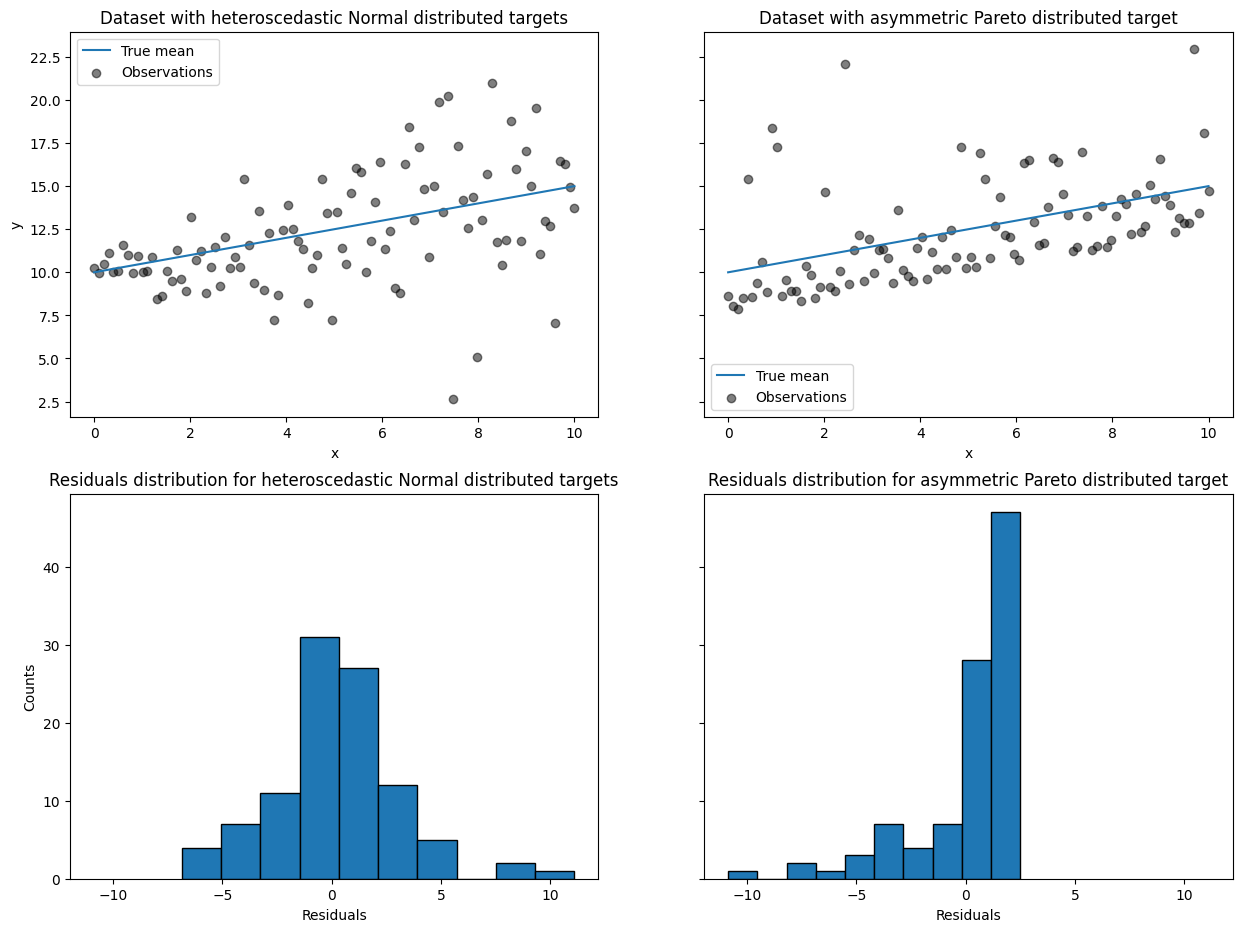

In [4]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0, 1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")

Avec la cible distribuée normalement hétéroscédastique, nous observons que la variance du bruit augmente lorsque la valeur de la caractéristique `x` augmente.

Avec la cible distribuée de manière asymétrique de Pareto, nous observons que les résidus positifs sont bornés.

Ces types de cibles bruitées rendent l'estimation via [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) moins efficace, c'est-à-dire que nous avons besoin de plus de données pour obtenir des résultats stables et, de plus, les valeurs aberrantes importantes peuvent avoir un impact énorme sur les coefficients ajustés. (Autrement dit : dans un cadre de variance constante, les estimateurs des moindres carrés ordinaires convergent beaucoup plus rapidement vers les vrais coefficients avec une taille d'échantillon croissante.)

Dans ce cadre asymétrique, la médiane ou différents quantiles apportent des informations supplémentaires. De plus, l'estimation de la médiane est beaucoup plus robuste aux valeurs aberrantes et aux distributions à queue lourde. Mais notez que les quantiles extrêmes sont estimés à partir de très peu de points de données. Les quantiles à 95 % sont plus ou moins estimés à partir des 5 % de plus grandes valeurs et sont donc également un peu sensibles aux valeurs aberrantes.

Dans le reste de ce tutoriel, nous montrerons comment [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) peut être utilisé en pratique et donner une intuition sur les propriétés des modèles ajustés. Enfin, nous comparerons [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) et [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

# Ajustement d'un [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html)

Dans cette section, nous voulons estimer la médiane conditionnelle ainsi qu'un quantile bas et haut fixé à 5 % et 95 %, respectivement. Ainsi, nous obtiendrons trois modèles linéaires, un pour chaque quantile.

Nous utiliserons les quantiles à 5 % et 95 % pour trouver les valeurs aberrantes dans l'échantillon d'entraînement au-delà de l'intervalle central de 90 %.

In [5]:
from sklearn.utils.fixes import parse_version, sp_version

# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [6]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

Maintenant, nous pouvons tracer les trois modèles linéaires et les échantillons distingués qui se trouvent à l'intérieur de l'intervalle central de 90 % par rapport aux échantillons situés en dehors de cet intervalle.

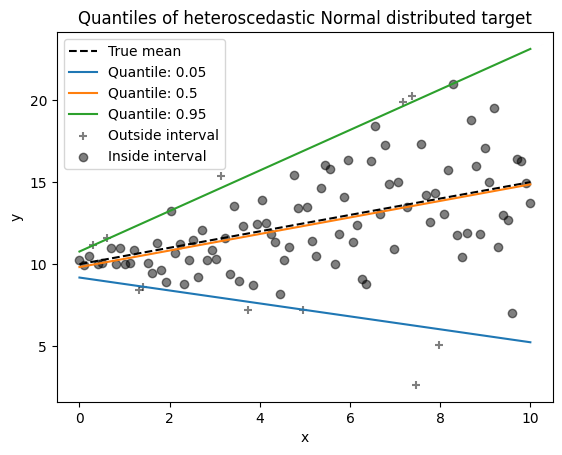

In [7]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

Comme le bruit est toujours distribué normalement, en particulier est symétrique, la véritable moyenne conditionnelle et la véritable médiane conditionnelle coïncident. En effet, nous constatons que la médiane estimée atteint presque la vraie moyenne. Nous observons l'effet d'avoir une variance de bruit croissante sur les quantiles à 5 % et 95 % : les pentes de ces quantiles sont très différentes et l'intervalle entre eux devient plus large avec l'augmentation de `x`.

Pour avoir une intuition supplémentaire concernant la signification des estimateurs des quantiles à 5 % et 95 %, on peut compter le nombre d'échantillons au-dessus et en dessous des quantiles prédits (représentés par une croix sur le graphique ci-dessus), en considérant que nous avons un total de 100 échantillons.

Nous pouvons répéter la même expérience en utilisant la cible distribuée asymétrique de Pareto.

In [8]:
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_pareto).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_pareto
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_pareto
        )

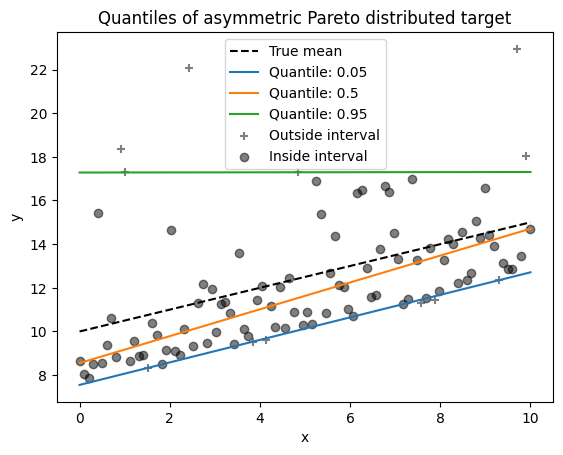

In [9]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_pareto[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_pareto[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of asymmetric Pareto distributed target")

En raison de l'asymétrie de la distribution du bruit, nous observons que la vraie moyenne et la médiane conditionnelle estimée sont différentes. Nous observons également que chaque modèle de quantile a des paramètres différents pour mieux s'adapter au quantile souhaité. Notez qu'idéalement, tous les quantiles seraient parallèles dans ce cas, ce qui deviendrait plus visible avec plus de points de données ou des quantiles moins extrêmes, par exemple 10 % et 90 %.

# Comparaison de [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) et [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Dans cette section, nous nous attarderons sur la différence entre l'erreur que [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) et [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) cherchent à minimiser.

En effet, [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) est une approche des moindres carrés qui minimise l'erreur quadratique moyenne (MSE) entre les cibles d'entraînement et les cibles prédites. En revanche, [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) avec `quantile=0.5` minimise plutôt l'erreur absolue moyenne (MAE).

Commençons par calculer les erreurs d'entraînement de ces modèles en termes d'erreur quadratique moyenne et d'erreur absolue moyenne. Nous utiliserons la cible distribuée de manière asymétrique de Pareto pour rendre les choses plus intéressantes, car la moyenne et la médiane ne sont pas égales.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
quantile_regression = QuantileRegressor(quantile=0.5, alpha=0, solver=solver)

y_pred_lr = linear_regression.fit(X, y_pareto).predict(X)
y_pred_qr = quantile_regression.fit(X, y_pareto).predict(X)

print(f"""Training error (in-sample performance)
    {linear_regression.__class__.__name__}:
    MAE = {mean_absolute_error(y_pareto, y_pred_lr):.3f}
    MSE = {mean_squared_error(y_pareto, y_pred_lr):.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {mean_absolute_error(y_pareto, y_pred_qr):.3f}
    MSE = {mean_squared_error(y_pareto, y_pred_qr):.3f}
    """)

Training error (in-sample performance)
    LinearRegression:
    MAE = 1.805
    MSE = 6.486
    QuantileRegressor:
    MAE = 1.670
    MSE = 7.025
    


Sur l'ensemble d'entraînement, nous constatons que l'MAE est plus faible pour [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) que pour [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). En revanche, la MSE est plus faible pour [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) que pour [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html). Ces résultats confirment que la MAE est la perte minimisée par [**`QuantileRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html) tandis que la MSE est la perte minimisée par [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Nous pouvons faire une évaluation similaire en examinant l'erreur de test obtenue par validation croisée.

In [11]:
from sklearn.model_selection import cross_validate

cv_results_lr = cross_validate(
    linear_regression,
    X,
    y_pareto,
    cv=3,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
cv_results_qr = cross_validate(
    quantile_regression,
    X,
    y_pareto,
    cv=3,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
print(f"""Test error (cross-validated performance)
    {linear_regression.__class__.__name__}:
    MAE = {-cv_results_lr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_lr["test_neg_mean_squared_error"].mean():.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {-cv_results_qr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_qr["test_neg_mean_squared_error"].mean():.3f}
    """)

Test error (cross-validated performance)
    LinearRegression:
    MAE = 1.732
    MSE = 6.690
    QuantileRegressor:
    MAE = 1.679
    MSE = 7.129
    


Nous parvenons à des conclusions similaires lors de l'évaluation hors échantillon.